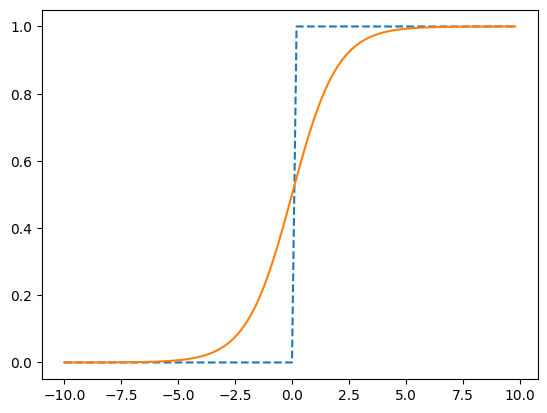

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1/(1+np.exp(-x))

a=np.arange(-10,10,0.2)
def step(x):
    return np.array(x>0,dtype=np.int64)
y=step(a)
plt.plot(a,y,linestyle="--")
plt.plot(a,sigmoid(a))
plt.show()


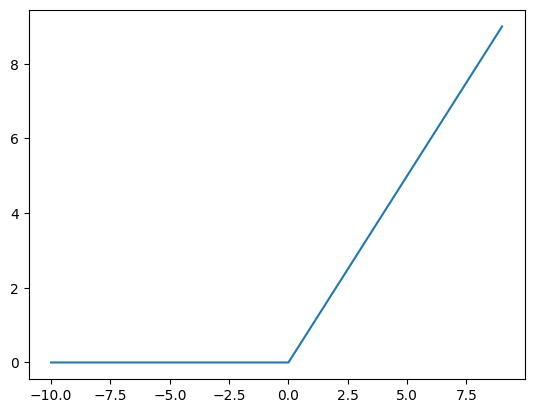

In [2]:
def relu(x):
    return np.maximum(0,x)

a=np.arange(-10,10-0.1)
y=relu(a)
plt.plot(a,y)
plt.show()

In [3]:
a=np.array([[1,2],[2,2],[3,4]])
print(a)
a.shape[0]

[[1 2]
 [2 2]
 [3 4]]


3

In [4]:
a=np.array([[1,2],[3,4]])
b=np.array([[5,6,3],[7,8,3]])
c=np.dot(a,b)
print(c)

[[19 22  9]
 [43 50 21]]


In [5]:
print(np.array([1,2]))

[1 2]


In [6]:
def softmax(a):
    exp_a=np.exp(a-np.max(a))
    sum_exp=np.sum(exp_a)
    return exp_a/sum_exp
a=np.array([0.3,2.9,4.0])
print(softmax(a))

[0.01821127 0.24519181 0.73659691]


In [7]:
def mean_squared_error(y,t):
    print(sum((y-t)**2))
    return 0.5*np.sum((y-t)**2)

In [8]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y=np.array(y)
t=np.array(t)
print(mean_squared_error(y,t))


0.19500000000000006
0.09750000000000003


In [9]:
def cross_entropy_error(y,t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta))
    

In [10]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y=np.array(y)
t=np.array(t)
print(cross_entropy_error(y,t))

0.510825457099338


In [11]:
# 这个是一维数组求梯度，神经网络会一次性塞所有的样本给他，得重写
import numpy as np
def numerical_gradient(f,x):
    h= 1e-4
    grad=np.zeros_like(x)
    for idx in range(x.size):
        tmp=x.copy()
        tmp1=x[idx]+h
        tmp[idx]=tmp1
  
        ftmp1=f(tmp)
        tmp2=x[idx]-h
        tmp[idx]=tmp2
     
        ftmp2=f(tmp)
        res=(ftmp1-ftmp2)/(2*h)
        grad[idx]=res
    return grad
        
        

In [12]:
def test(a):
    return a[0]**2+a[1]**2
a=np.array([2.0,2.0])
ans=numerical_gradient(test,a)
print(ans)

[4. 4.]


In [13]:
def gradient_descent(f,init_x,lr=1.01,step_num=200):
    x=init_x
    for i in range(step_num):
        x-=numerical_gradient(f,x)*lr
    return x
        
    

In [14]:
a=np.array([2.0,2.0])
print(gradient_descent(test,a),test(gradient_descent(test,a)))

[5509.32952996 5509.32952996] 60705423.73936597


不行了 真的得写注释 不然根本看不懂
--

In [15]:
# 求解当前神经网络的梯度
class simpleNet:
    def __init__(self):
        # 随机一个初始神经元
        self.W=np.random.randn(2,3) 
    def predict(self,x):
        return np.dot(x,self.W)
    def loss(self,x,t):
        z=self.predict(x)
        y=softmax(z)
        loss=cross_entropy_error(y,t)
        return loss
net=simpleNet()
print(net.W)
x=np.array([0.6,0.9])
p=net.predict(x)
print(p)

[[ 0.18450806  1.61618374  0.32891869]
 [ 1.11100228  0.68233857 -0.17730878]]
[1.11060689 1.58381495 0.03777332]


In [16]:
import numpy as np
import tensorflow as tf

# Keras/TensorFlow 自动处理下载和加载
(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()

# 1. 扁平化和标准化（复现 load_mnist(flatten=True, normalize=False) 的效果）

# 扁平化图像 (60000, 28, 28) -> (60000, 784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# 标签无需处理 (Keras 默认返回 NumPy 数组)

# 2. 输出各个数据的形状
print("--- 使用 TensorFlow/Keras 加载 ---")
print(f"训练集图像形状 (x_train.shape): {x_train.shape}")
print(f"训练集标签形状 (t_train.shape): {t_train.shape}")
print(f"测试集图像形状 (x_test.shape): {x_test.shape}")
print(f"测试集标签形状 (t_test.shape): {t_test.shape}")

--- 使用 TensorFlow/Keras 加载 ---
训练集图像形状 (x_train.shape): (60000, 784)
训练集标签形状 (t_train.shape): (60000,)
测试集图像形状 (x_test.shape): (10000, 784)
测试集标签形状 (t_test.shape): (10000,)


In [17]:
from PIL import Image
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    

img = x_train[0]
label = t_train[0]
print(label) # 5
print(img.shape) # (784,)
img = img.reshape(28, 28) # 把图像的形状变成原来的尺寸
print(img.shape) # (28, 28)
img_show(img)

5
(784,)
(28, 28)


In [19]:
class TwolayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        self.params={}
        self.params['W1']=weight_init_std*np.random.randn(input_size,hidden_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2']=np.zeros(output_size)
    def predict(self,x):
        W1,W2=self.params['W1'],self.params['W2']
        b1,b2=self.params['b1'],self.params['b2']
        a1=np.dot(x,W1)+b1
        z1=sigmoid(a1)
        a2=np.dot(z1,W2)+b2
        y=softmax(a2)
        return y
    def loss(self,x,t):
        y=self.predict(x)
        return cross_entropy_error(y,t)
    def accuracy(self,x,t):
        y=self.predict(x)
        y=np.argmax(y,axis=1)
        t=np.argmax(t,axis=1)
        accuracy=np.sum(y==t)/float(x.shape[0])
        return accuracy
    def numerical_gradient(self,x,t):
        loss_W=lambda W:self.loss(x,t)
        grads={}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads
        
net=TwolayerNet(input_size=784,hidden_size=100,output_size=10)
x=np.random.randn(100,784)
y=net.predict(x)
t=np.random.randn(100,10)
grads=net.numerical_gradient(x,t)
        

IndexError: index 784 is out of bounds for axis 0 with size 784